=== Embedding vectors (3D) ===
I: [0.33669037 0.1288094  0.23446237]
love: [ 0.23033303 -1.1228564  -0.18632829]
AI: [ 2.2082014  -0.63799703  0.46165723]


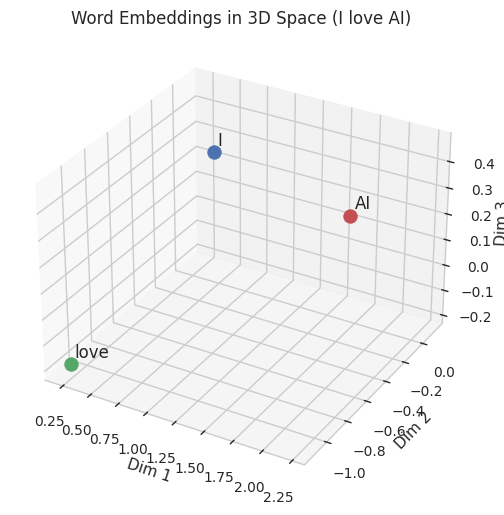

In [33]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(42)  # 시드 고정

# ---------------------------------------------------------
# 1. 단어 사전 정의
# ---------------------------------------------------------
vocab = ["I", "love", "AI"]
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# ---------------------------------------------------------
# 2. 임베딩 레이어 정의 (임베딩 차원 = 3)
# ---------------------------------------------------------
embedding_dim = 3
embedding = nn.Embedding(num_embeddings=len(vocab), embedding_dim=embedding_dim)

# ---------------------------------------------------------
# 3. 단어 인덱스를 텐서로 변환
# ---------------------------------------------------------
sentence = ["I", "love", "AI"]
word_indices = torch.tensor([word_to_idx[w] for w in sentence])

# ---------------------------------------------------------
# 4. 임베딩 적용
# ---------------------------------------------------------
embedded = embedding(word_indices)  # (3, 3)

print("=== Embedding vectors (3D) ===")
for i, w in enumerate(sentence):
    print(f"{w}: {embedded[i].detach().numpy()}")

# ---------------------------------------------------------
# 5. 3D 시각화 (단어만 표시)
# ---------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

for i, w in enumerate(sentence):
    vec = embedded[i].detach().numpy()
    ax.scatter(vec[0], vec[1], vec[2], s=100)
    ax.text(vec[0]+0.02, vec[1]+0.02, vec[2]+0.02, w, fontsize=12)

ax.set_title("Word Embeddings in 3D Space (I love AI)")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")

plt.show()


In [1]:
import torch
import torch.nn.functional as F

# 입력 차원과 은닉 상태 차원 정의
d_x = 5    # 입력 차원
d_h = 3    # 은닉 상태 차원

# 가중치 행렬 및 편향 초기화
W_h = torch.randn(d_h, d_h, requires_grad=True)  # (d_h, d_h)
W_x = torch.randn(d_h, d_x, requires_grad=True)  # (d_h, d_x)
b   = torch.randn(d_h, 1, requires_grad=True)    # (d_h, 1)

# 시퀀스 길이
T = 4

# 입력 시퀀스 (T, d_x, 1)
x_seq = torch.randn(T, d_x, 1)  # 각 시점 입력을 (d_x, 1) 컬럼 벡터로

# 은닉 상태 초기화 (d_h, 1)
h_t = torch.zeros(d_h, 1)

# 순전파 진행
for t in range(T):
    x_t = x_seq[t]                                   # (d_x, 1)
    # 수식: h_t = tanh(W_h h_{t-1} + W_x x_t + b)
    h_t = torch.tanh(W_h @ h_t + W_x @ x_t + b)      # (d_h, 1)
    print(f"Step {t+1} → h_t =\n{h_t.detach().numpy()}\n")


Step 1 → h_t =
[[-0.9961276]
 [ 0.987332 ]
 [ 0.9854661]]

Step 2 → h_t =
[[-0.97384745]
 [-0.9164264 ]
 [-0.76741076]]

Step 3 → h_t =
[[ 0.72527707]
 [-0.85318726]
 [ 0.89678425]]

Step 4 → h_t =
[[0.9746567]
 [0.9953782]
 [0.942074 ]]



Step 1 (I) → x_t = [0.33669037 0.1288094  0.23446237] → h_t = [ 0.31682923 -0.04786298  0.3737703 ]
Step 2 (love) → x_t = [ 0.23033303 -1.1228564  -0.18632829] → h_t = [0.18539174 0.07577167 0.36076465]
Step 3 (AI) → x_t = [ 2.2082014  -0.63799703  0.46165723] → h_t = [ 0.86537606 -0.53588647  0.96547866]


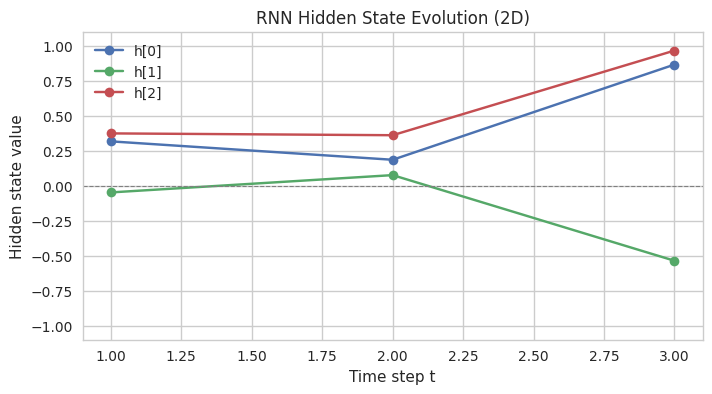

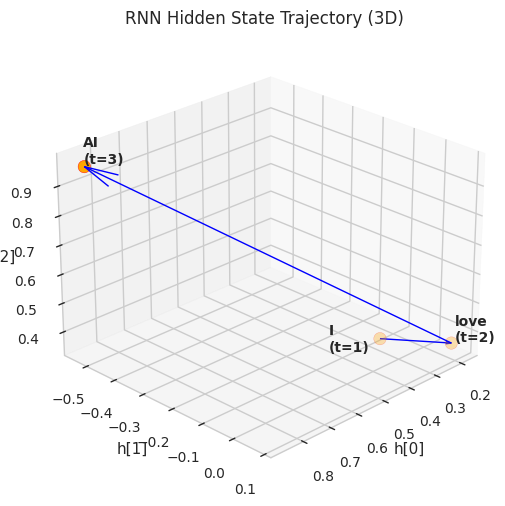

In [58]:
# import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# ---------------------------------------------------------
# 1. 단어 사전 정의
# ---------------------------------------------------------
# 문장 "I love AI" → 단어 사전과 단어→인덱스 매핑
vocab = ["I", "love", "AI"]
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

# ---------------------------------------------------------
# 2. 임베딩 레이어 정의
# ---------------------------------------------------------
# nn.Embedding: 각 단어 인덱스를 (embedding_dim 차원) 밀집 벡터로 매핑
torch.manual_seed(42)           # 재현성 보장
d_x = 3                         # 입력 차원 (embedding_dim)
embedding = nn.Embedding(num_embeddings=len(vocab), embedding_dim=d_x)

# ---------------------------------------------------------
# 3. RNN 가중치 초기화
# ---------------------------------------------------------
d_h = 3                         # 은닉 상태 차원

# W_x ∈ ℝ^(d_h × d_x) = (3×3)
#   입력 x_t ∈ ℝ^(d_x × 1) = (3×1) → 은닉 공간 ℝ^(d_h × 1) = (3×1)
W_x = torch.tensor([[0.5, 0.1, 0.2],
                    [-0.3, 0.0, -0.2],
                    [0.8, 0.0, 0.1]], dtype=torch.float32)

# W_h ∈ ℝ^(d_h × d_h) = (3×3)
#   이전 은닉 h_{t-1} ∈ ℝ^(d_h × 1) = (3×1) → 현재 은닉 h_t ∈ ℝ^(d_h × 1) = (3×1)
W_h = torch.tensor([[0.4, 0.1, 0.0],
                    [0.1, 0.5, 0.0],
                    [0.0, 0.0, 0.3]], dtype=torch.float32)

# b ∈ ℝ^(d_h × 1) = (3×1)
b = torch.tensor([[0.1], [0.1], [0.1]], dtype=torch.float32)

# ---------------------------------------------------------
# 4. 입력 시퀀스 구성 ("I love AI")
# ---------------------------------------------------------
sentence = ["I", "love", "AI"]                 # T = 3
word_indices = torch.tensor([word_to_idx[w] for w in sentence])   # [0, 1, 2]

# 임베딩 후: (T × d_x) = (3×3)
# unsqueeze(-1) → (T × d_x × 1) = (3×3×1), column vector 형태
x_seq = embedding(word_indices).unsqueeze(-1)

# ---------------------------------------------------------
# 5. 순전파 계산: 
#    h_t = tanh(W_h h_{t-1} + W_x x_t + b)
# ---------------------------------------------------------
# h_0 ∈ ℝ^(d_h × 1) = (3×1)
h_t = torch.zeros(d_h, 1)
h_values = []  # numpy로 저장 (T × d_h)

for t in range(len(sentence)):
    x_t = x_seq[t]  # x_t ∈ ℝ^(d_x × 1) = (3×1)

    # (d_h×d_h @ d_h×1) + (d_h×d_x @ d_x×1) + (d_h×1) = d_h×1
    h_t = torch.tanh(W_h @ h_t + W_x @ x_t + b)

    h_values.append(h_t.detach().numpy().squeeze())

    # step 로그: 단어, 입력 x_t, 은닉 상태 h_t
    print(f"Step {t+1} ({sentence[t]}) → x_t = {x_t.squeeze().detach().numpy()} → h_t = {h_t.squeeze().detach().numpy()}")

# numpy 배열로 변환: (T × d_h) = (3×3)
h_values = np.array(h_values)
timesteps = np.arange(1, len(sentence)+1)

# ---------------------------------------------------------
# 6. 2차원 시각화: hidden state 각 차원별 시간에 따른 변화
# ---------------------------------------------------------
plt.figure(figsize=(8, 4))
for i in range(h_values.shape[1]):
    plt.plot(timesteps, h_values[:, i], marker='o', label=f"h[{i}]")

plt.title("RNN Hidden State Evolution (2D)")
plt.xlabel("Time step t")
plt.ylabel("Hidden state value")
plt.ylim(-1.1, 1.1)
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.legend()
plt.show()

# ---------------------------------------------------------
# 7. 3차원 시각화: hidden trajectory + 화살표
# ---------------------------------------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(h_values[:, 0], h_values[:, 1], h_values[:, 2],
           color="orange", edgecolor="red", s=80, zorder=5)

# 화살표로 이동 방향 표시
for i in range(len(h_values) - 1):
    start = h_values[i]
    end = h_values[i + 1]
    direction = end - start
    ax.quiver(start[0], start[1], start[2],
              direction[0], direction[1], direction[2],
              color="blue", arrow_length_ratio=0.08, linewidth=1.0)

# 각 점 라벨
for i, word in enumerate(sentence):
    dx, dy, dz = 0.05, 0.05, 0.05
    if word == "I":
        dx, dy, dz = 0.29, 0.08, 0.12
    ax.text(h_values[i, 0] + dx, h_values[i, 1] + dy, h_values[i, 2] + dz,
            f"{word}\n(t={i+1})", fontsize=10, weight="bold")

ax.view_init(elev=25, azim=45)

ax.set_title("RNN Hidden State Trajectory (3D)")
ax.set_xlabel("h[0]")
ax.set_ylabel("h[1]")
ax.set_zlabel("h[2]")
plt.show()
